In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score

In [70]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [71]:
!pip install gdown
import gdown


file_id = "1hpT42Sckp6CsTeaUS1PNpzW-rPhePG1l"

gdown.download(f"https://drive.google.com/uc?id={file_id}", "titanic.csv",quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1hpT42Sckp6CsTeaUS1PNpzW-rPhePG1l
To: /content/titanic.csv
100%|██████████| 29.5k/29.5k [00:00<00:00, 46.6MB/s]


'titanic.csv'

In [72]:
df= pd.read_csv("titanic.csv")

In [73]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# **Handling missing values**

In [74]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [75]:
df.shape

(418, 12)

In [76]:
df['Age'].fillna(df['Age'].median(), inplace=True)

<ipython-input-76-63d4fb902a4f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [77]:
#it is better to drop the coloum because 327 out of 418 is null
df.drop(columns=['Cabin'], inplace=True)

In [78]:
df.dropna(subset=['Fare'], inplace=True)

# **Encode Categorical Variables**

In [79]:
label_encoder = LabelEncoder()

In [80]:
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [81]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [82]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,True,False
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,False,True
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,True,False
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,False,True
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,False,True


# **Normalization**

In [83]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [84]:
x = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]

In [85]:
y=df['Survived']

In [86]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,0.452723,0,0,0.015282,True,False
1,3,0,0.617566,1,0,0.013663,False,True
2,2,1,0.815377,0,0,0.018909,True,False
3,3,1,0.353818,0,0,0.016908,False,True
4,3,0,0.287881,1,1,0.023984,False,True


# **Finding Correlation**

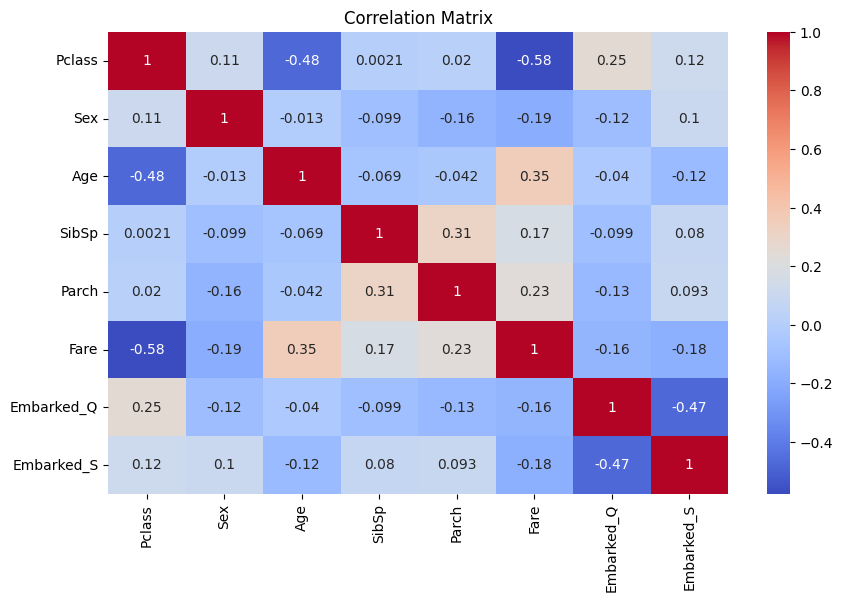

In [87]:
corr_matrix = x.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [88]:
x['FamilySize'] = x['SibSp'] + x['Parch']
x = x.drop(['SibSp', 'Parch'], axis=1)

<ipython-input-88-83559bb0f2dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['FamilySize'] = x['SibSp'] + x['Parch']


In [89]:
x.head()

,Pclass,Sex,Age,Fare,Embarked_Q,Embarked_S,FamilySize
0,3,1,0.452723,0.015282,True,False,0
1,3,0,0.617566,0.013663,False,True,1
2,2,1,0.815377,0.018909,True,False,0
3,3,1,0.353818,0.016908,False,True,0
4,3,0,0.287881,0.023984,False,True,2


In [90]:
y.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [91]:

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [92]:
results = {}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    y_train_pred = cross_val_predict(model, X_train, y_train, cv=kf)

    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    if hasattr(model, 'predict_proba'):
        y_test_prob = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_test_prob)
    else:
        roc_auc = None

    results[name] = {
        "Train Accuracy": train_accuracy,
        "Train Precision": train_precision,
        "Train F1-Score": train_f1,
        "Test Accuracy": test_accuracy,
        "Test Precision": test_precision,
        "Test F1-Score": test_f1,
        "Test ROC-AUC": roc_auc
    }


In [93]:
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Train Accuracy (Cross-Validated): {metrics['Train Accuracy']:.4f}")
    print(f"  Train Precision (Cross-Validated): {metrics['Train Precision']:.4f}")
    print(f"  Train F1-Score (Cross-Validated): {metrics['Train F1-Score']:.4f}")
    print(f"  Test Accuracy: {metrics['Test Accuracy']:.4f}")
    print(f"  Test Precision: {metrics['Test Precision']:.4f}")
    print(f"  Test F1-Score: {metrics['Test F1-Score']:.4f}")
    if metrics['Test ROC-AUC'] is not None:
        print(f"  Test ROC-AUC: {metrics['Test ROC-AUC']:.4f}")
    else:
        print("  Test ROC-AUC: Not available for this model")
    print("-" * 40)

Logistic Regression:
  Train Accuracy (Cross-Validated): 1.0000
  Train Precision (Cross-Validated): 1.0000
  Train F1-Score (Cross-Validated): 1.0000
  Test Accuracy: 1.0000
  Test Precision: 1.0000
  Test F1-Score: 1.0000
  Test ROC-AUC: 1.0000
----------------------------------------
Decision Tree:
  Train Accuracy (Cross-Validated): 1.0000
  Train Precision (Cross-Validated): 1.0000
  Train F1-Score (Cross-Validated): 1.0000
  Test Accuracy: 1.0000
  Test Precision: 1.0000
  Test F1-Score: 1.0000
  Test ROC-AUC: 1.0000
----------------------------------------
Random Forest:
  Train Accuracy (Cross-Validated): 1.0000
  Train Precision (Cross-Validated): 1.0000
  Train F1-Score (Cross-Validated): 1.0000
  Test Accuracy: 1.0000
  Test Precision: 1.0000
  Test F1-Score: 1.0000
  Test ROC-AUC: 1.0000
----------------------------------------
SVM:
  Train Accuracy (Cross-Validated): 0.9970
  Train Precision (Cross-Validated): 1.0000
  Train F1-Score (Cross-Validated): 0.9957
  Test Accura